### 3. Feature Detection and Description 

- Teams will implement feature detection and description using OpenCV. 
- Teams will select and implement at least two feature detection/description 
algorithms (SIFT, SURF, ORB, or others). 
- A comparison of the chosen algorithms' performance is required in the evaluation. 

- Hints for comparison: 
    - Number of detected features: How many keypoints does each algorithm detect in the same image? More keypoints are not always better, but a sufficient number is required for reliable matching. Students could create a plot of the number of features detected vs frame number. 
    - Matching performance: How many correct matches are found by each algorithm? This can be evaluated by visually inspecting a subset of the matches. Students could visualise the matches using a small number of image pairs (e.g., 5-10 pairs). 
    - Computational speed: How long does each algorithm take to detect and describe features? Students can use Python's time module to measure the execution time for this stage. 
    - Robustness to image transformations: How well do the algorithms perform under different conditions, such as changes in scale, rotation, illumination, and viewpoint? This can be done qualitatively by selecting image pairs with significant viewpoint changes and observing the number of matches. 
    - Qualitative assessment: How well do the features visually correspond between frames? Students can create a montage of a few frames, and the feature matches. 
-  Teams must explain the algorithms' parameters and justify their values. 

### SIFT Algorithm

In [82]:
import cv2
import matplotlib.pyplot as plt
import time
import imageio.v3 as iio
import matplotlib.pyplot as plt

In [83]:
# pip install imageio[ffmpeg]
def load_video_frames(video_path, frame_interval=10, display_frames=True):
    # Load frames from a video file at specified intervals.

    frame_count = 0
    frames = []  # List to store frames for visualization

    try:
        print(f"Opening video file: {video_path}")
        
        # Iterate through frames in the video file
        for frame in iio.imiter(video_path):
            if frame_count % frame_interval == 0:
                frames.append(frame)  # Store frame in list
                
                # Display frame if display_frames is True
                if display_frames:
                    plt.imshow(frame)
                    plt.title(f'Frame {frame_count}')
                    plt.axis('off')
                    plt.show()
                
            frame_count += 1

    except FileNotFoundError:
        print(f"Error: Video file not found at {video_path}")
        return [], 0
    except Exception as e:
        print(f"An error occurred while processing the video: {e}")
        return [], 0

    print(f"\nFinished processing video.")
    print(f"Total frames iterated: {frame_count}")
    
    return frames

frames = load_video_frames('../videos/livingroom.mp4', frame_interval=1, display_frames=False)

Opening video file: ../videos/livingroom.mp4

Finished processing video.
Total frames iterated: 452


SIFT took 0.2346 seconds to process two images.


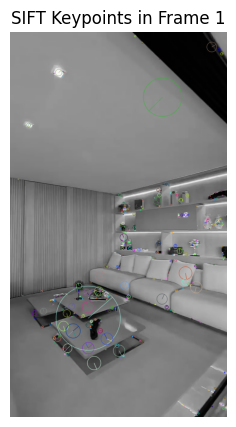

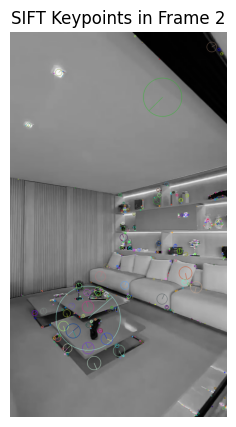

In [84]:
# Load two sample grayscale frames
img1 = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(frames[10], cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector - TO TUNE PARAMETERS
sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

# Time the detection and description process
start_time = time.time()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)
elapsed_time = time.time() - start_time
print(f"SIFT took {elapsed_time:.4f} seconds to process two images.")

# Visualize keypoints
img_kp1 = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 5))
plt.imshow(img_kp1, cmap='gray')
plt.title("SIFT Keypoints in Frame 1")
plt.axis('off')
plt.show()

# Visualize keypoints
img_kp2 = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 5))
plt.imshow(img_kp1, cmap='gray')
plt.title("SIFT Keypoints in Frame 2")
plt.axis('off')
plt.show()


In [ ]:
import cv2
import time
import random
import matplotlib.pyplot as plt

def SIFT_Algorithm(frames, num_pairs=5):
    if len(frames) < 2:
        print("Need at least two frames.")
        return

    sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)

    total_pairs = len(frames) - 1
    if num_pairs > total_pairs:
        print(f"Only {total_pairs} consecutive pairs available.")
        num_pairs = total_pairs

    # Sample starting indices for consecutive pairs
    start_indices = random.sample(range(total_pairs), num_pairs)

    for idx, i in enumerate(start_indices, 1):
        j = i + 1
        img1 = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(frames[j], cv2.COLOR_BGR2GRAY)

        start = time.time()
        kp1, _ = sift.detectAndCompute(img1, None)
        kp2, _ = sift.detectAndCompute(img2, None)
        elapsed = time.time() - start

        print(f"\nPair {idx}: Frame {i} vs Frame {j}")
        print(f"- Keypoints in Frame {i}: {len(kp1)}")
        print(f"- Keypoints in Frame {j}: {len(kp2)}")
        print(f"- Detection Time: {elapsed:.4f} seconds")

        img_kp1 = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        img_kp2 = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(img_kp1, cmap='gray')
        axes[0].set_title(f"Frame {i} Keypoints")
        axes[0].axis('off')

        axes[1].imshow(img_kp2, cmap='gray')
        axes[1].set_title(f"Frame {j} Keypoints")
        axes[1].axis('off')

        plt.suptitle(f"SIFT Keypoint Comparison (Pair {idx})")
        plt.tight_layout()
        plt.show()



Pair 1: Frame 19 vs Frame 20
- Keypoints in Frame 19: 500
- Keypoints in Frame 20: 500
- Detection Time: 0.2318 seconds


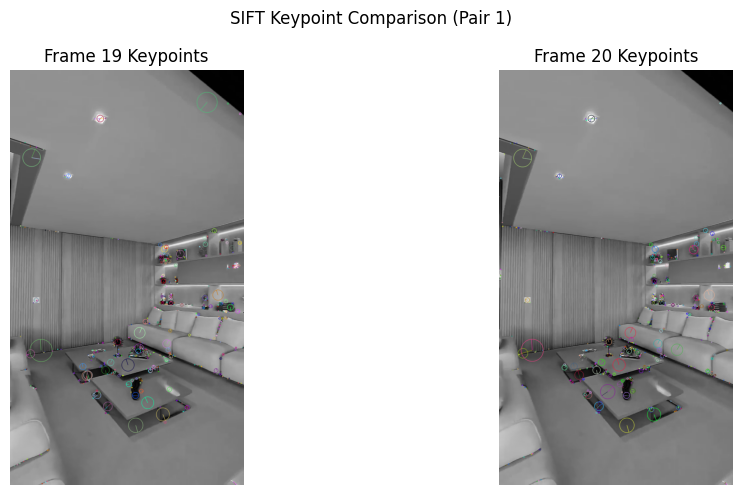


Pair 2: Frame 259 vs Frame 260
- Keypoints in Frame 259: 500
- Keypoints in Frame 260: 500
- Detection Time: 0.2028 seconds


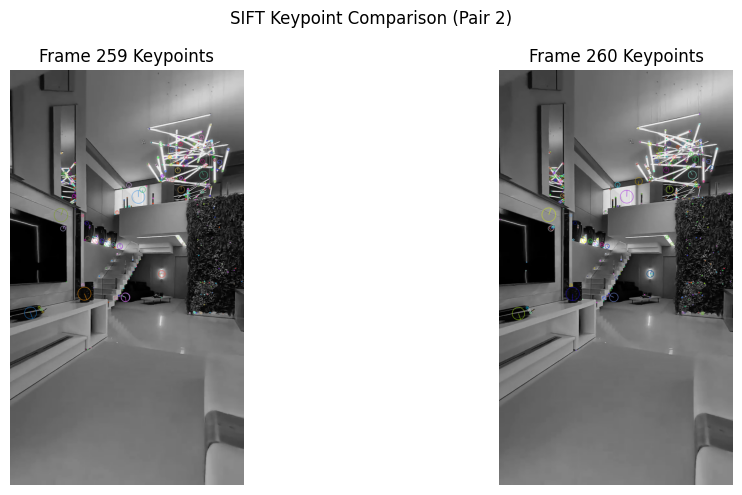


Pair 3: Frame 306 vs Frame 307
- Keypoints in Frame 306: 500
- Keypoints in Frame 307: 501
- Detection Time: 0.2145 seconds


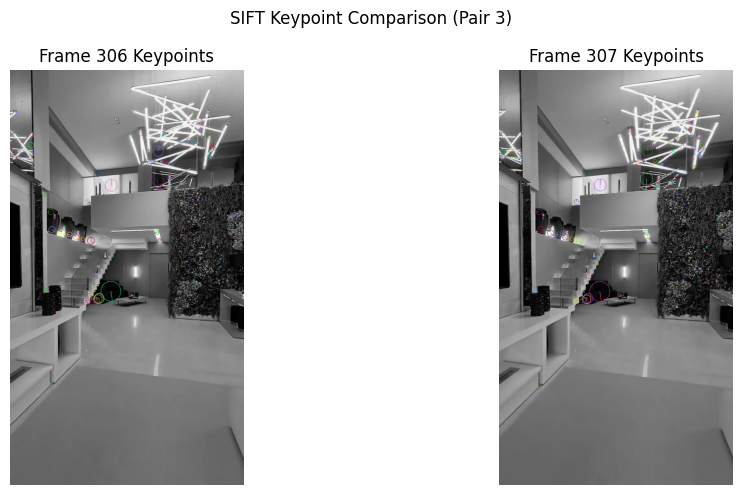


Pair 4: Frame 136 vs Frame 137
- Keypoints in Frame 136: 500
- Keypoints in Frame 137: 501
- Detection Time: 0.2112 seconds


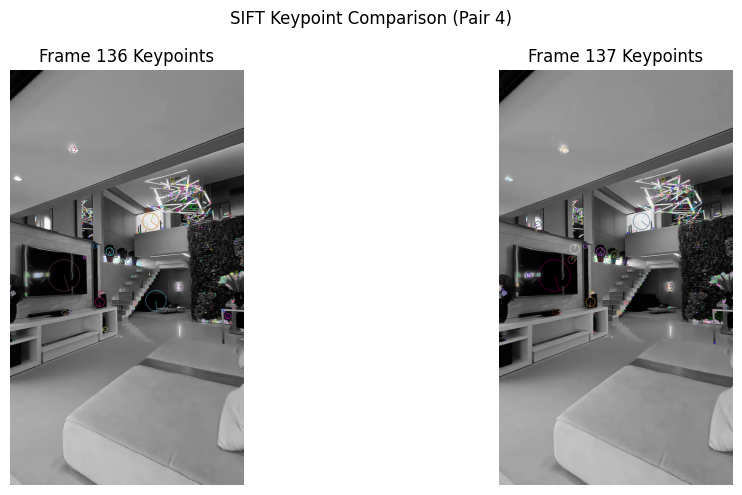


Pair 5: Frame 253 vs Frame 254
- Keypoints in Frame 253: 500
- Keypoints in Frame 254: 500
- Detection Time: 0.1984 seconds


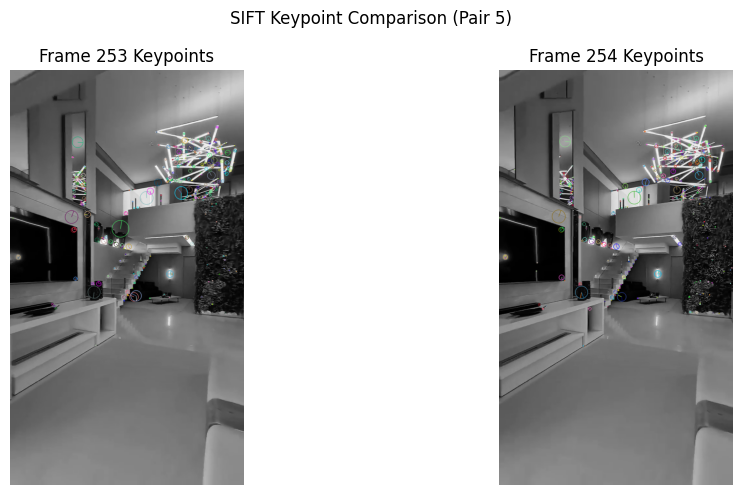


Pair 6: Frame 69 vs Frame 70
- Keypoints in Frame 69: 500
- Keypoints in Frame 70: 500
- Detection Time: 0.2101 seconds


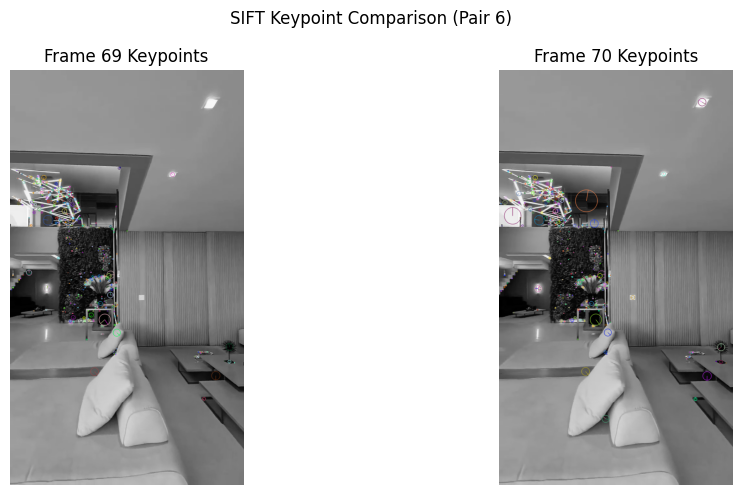


Pair 7: Frame 396 vs Frame 397
- Keypoints in Frame 396: 500
- Keypoints in Frame 397: 501
- Detection Time: 0.2272 seconds


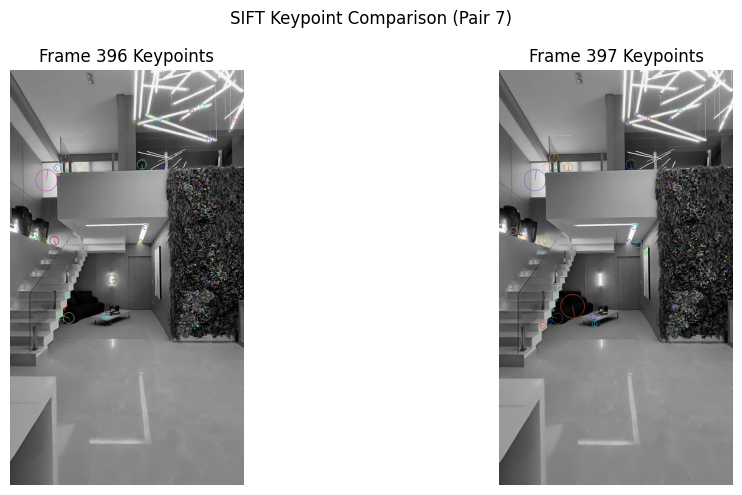

In [86]:
SIFT_Algorithm(frames, num_pairs=7)